In [1]:
from tensorflow.keras.models import Sequential    # 모델의 종류  import
from tensorflow.keras.layers import Dense         # layer 종류 Dense

import numpy as np
# from tensorflow.keras import model as md
# md.Sequential()

In [2]:
# 데이터를 load
Data_set = np.loadtxt('./data/data/ThoraricSurgery3.csv', delimiter=',')
print(Data_set.shape)  # x의 요소 -> 0~16, y의 값 -> 17
X = Data_set[:, 0:-1]
y = Data_set[:,-1]

(470, 17)


In [3]:
print(X.shape,y.shape)   # X와 Y의 행의 갯수가 같아야 함

(470, 16) (470,)


In [4]:
# model 설계
model = Sequential()   # 모델 설정
# 출력 node 수, input_dim : x의  열의 객수, 활성함수 : relu
model.add(Dense(30, input_dim=16, activation='relu'))  # layer 1 추가
model.add(Dense(1, activation='sigmoid')) # 출력층 추가

# 모델 실행
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X,y, epochs=10, batch_size=16)

Epoch 1/10
30/30 [==============================] - 1s 2ms/step - loss: 0.4780 - accuracy: 0.8511
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.8511
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8511
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.8511
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8511
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8511
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.8511
Epoch 8/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8511
Epoch 9/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8511
Epoch 10/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8511


In [5]:
history

In [6]:
history.history

{'loss': [0.4779861271381378,
  0.4516558349132538,
  0.45896655321121216,
  0.46256086230278015,
  0.43444812297821045,
  0.43998366594314575,
  0.4329163432121277,
  0.4116162955760956,
  0.43081745505332947,
  0.41222912073135376],
 'accuracy': [0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091]}

# chap 11. 데이터 다루기

In [7]:
import pandas as pd

In [57]:
df = pd.read_csv('./data/data/pima-indians-diabetes3.csv') # header=None

In [9]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# 당뇨병 환자의 수 출력
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [11]:
# 자료의 특징 확인
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# 각 요소간의 상관 관계 -> df.corr
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


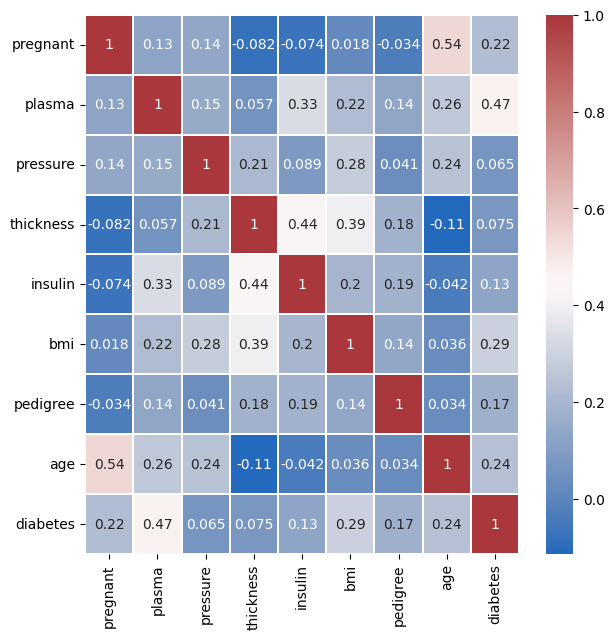

In [13]:
# 상관관계를 그래프로 표현 -> heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), linewidth=0.1, linecolor='white', annot=True, cmap='vlag')
plt.show()

In [14]:
import matplotlib

matplotlib.colormaps()      # cmap의 정보 출력

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

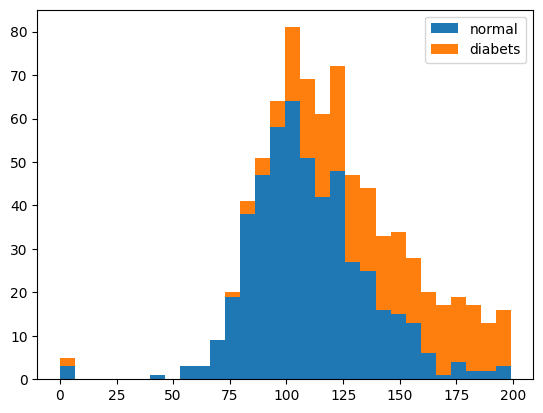

In [15]:
# plasma 속성에 대한 막대그래프 작성
X=[df.plasma[df.diabetes == 0], df.plasma[df.diabetes==1]]
plt.hist(x=X, bins=30, histtype='barstacked', label=['normal', 'diabets'])
plt.legend()
plt.show()

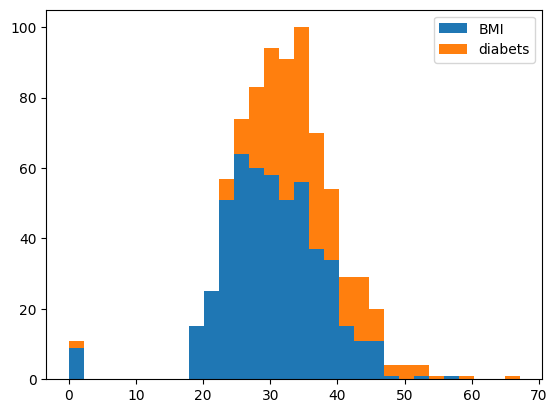

In [16]:
# BMI에 관한 막대그래프 생성
X=[df.bmi[df.diabetes == 0], df.bmi[df.diabetes==1]]
plt.hist(x=X, bins=30, histtype='barstacked', label=['BMI', 'diabets'])
plt.legend()
plt.show()

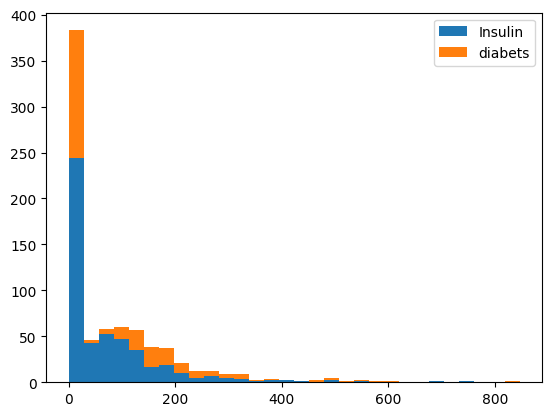

In [17]:
# 인슐린에 관한 막대그래프 생성
X=[df.insulin[df.diabetes == 0], df.insulin[df.diabetes==1]]
plt.hist(x=X, bins=30, histtype='barstacked', label=['Insulin', 'diabets'])
plt.legend()
plt.show()

In [18]:
# 딥러닝 모델을 생성하고, 모델을 실행
# 첫번째 layer node 수 -> 20, 활성함수 relu
# 두번쨰 layer node 수 -> 10, 활성함수 relu
# 출력층 추가
# 모델의 구조 확인 --> model.summary()
# optimizer, 실행 횟수, 손실함수를 임의로 설정해서 모델을 실행
len(df.columns)

9

In [35]:
data=df.iloc[:,0:-1]
target=df.iloc[:,-1]
model=Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(np.array(data),np.array(target),epochs=500)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 20)                180       
                                                                 
 dense_39 (Dense)            (None, 10)                210       
                                                                 
 dense_40 (Dense)            (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 0.3280 - accuracy: 0.6497
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.6393
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.6419
Epoch 4/500
24/24 [===

24/24 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.7305
Epoch 75/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.7096
Epoch 76/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.7161
Epoch 77/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.7318
Epoch 78/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.7487
Epoch 79/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.7500
Epoch 80/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.7461
Epoch 81/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.7552
Epoch 82/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.7656
Epoch 83/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1717 - accuracy: 0.7552
Epoch 84/500


24/24 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.7773
Epoch 156/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.7734
Epoch 157/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.7604
Epoch 158/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.7526
Epoch 159/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1549 - accuracy: 0.7904
Epoch 160/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.7786
Epoch 161/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.7917
Epoch 162/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.7708
Epoch 163/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1548 - accuracy: 0.7891
Epoch 164/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.7799
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.7852
Epoch 237/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1486 - accuracy: 0.7904
Epoch 238/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.7917
Epoch 239/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.7891
Epoch 240/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.7969
Epoch 241/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.7891
Epoch 242/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.7969
Epoch 243/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.7969
Epoch 244/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.7682
Epoch 245/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1526 - accuracy: 0.7891
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.8138
Epoch 318/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1351 - accuracy: 0.8203
Epoch 319/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.8138
Epoch 320/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.8164
Epoch 321/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1396 - accuracy: 0.8164
Epoch 322/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1358 - accuracy: 0.8177
Epoch 323/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1458 - accuracy: 0.7982
Epoch 324/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1432 - accuracy: 0.8034
Epoch 325/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.8073
Epoch 326/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1388 - accuracy: 0.8177
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.1325 - accuracy: 0.8281
Epoch 399/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.8294
Epoch 400/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.8333
Epoch 401/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.8099
Epoch 402/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.8177
Epoch 403/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.8112
Epoch 404/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.8164
Epoch 405/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.8333
Epoch 406/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1269 - accuracy: 0.8281
Epoch 407/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.8216
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.1331 - accuracy: 0.8216
Epoch 480/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.8242
Epoch 481/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.8073
Epoch 482/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.8255
Epoch 483/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.8346
Epoch 484/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1284 - accuracy: 0.8294
Epoch 485/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1285 - accuracy: 0.8255
Epoch 486/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1386 - accuracy: 0.8138
Epoch 487/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.8086
Epoch 488/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.8060
Epoc

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
X = df[['plasma','insulin','bmi','age']]
y = df.iloc[:,-1]

In [39]:
model1=Sequential()
model1.add(Dense(20, input_dim=4, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()
model1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model1.fit(np.array(X),np.array(y),epochs=500)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 20)                100       
                                                                 
 dense_45 (Dense)            (None, 10)                210       
                                                                 
 dense_46 (Dense)            (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.6471
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.6458
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.6549
Epoch 4/500
24/24 [===

24/24 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.6680
Epoch 75/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.6732
Epoch 76/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.6992
Epoch 77/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.6719
Epoch 78/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.7070
Epoch 79/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.7070
Epoch 80/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.6536
Epoch 81/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.6966
Epoch 82/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.6901
Epoch 83/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.6836
Epoch 84/500


24/24 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.7630
Epoch 156/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1704 - accuracy: 0.7578
Epoch 157/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.7591
Epoch 158/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.7695
Epoch 159/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.7643
Epoch 160/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.7604
Epoch 161/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.7591
Epoch 162/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.7292
Epoch 163/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1717 - accuracy: 0.7617
Epoch 164/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.7630
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.7643
Epoch 237/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.7630
Epoch 238/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.7565
Epoch 239/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.7500
Epoch 240/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.7682
Epoch 241/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.7812
Epoch 242/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.7721
Epoch 243/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1802 - accuracy: 0.7331
Epoch 244/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.7734
Epoch 245/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1638 - accuracy: 0.7695
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.7760
Epoch 318/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.7812
Epoch 319/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.7682
Epoch 320/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.7786
Epoch 321/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.7591
Epoch 322/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.7357
Epoch 323/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.7786
Epoch 324/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.7617
Epoch 325/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.7617
Epoch 326/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.7617
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.1527 - accuracy: 0.7799
Epoch 399/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1642 - accuracy: 0.7604
Epoch 400/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1718 - accuracy: 0.7357
Epoch 401/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.7578
Epoch 402/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.7695
Epoch 403/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.7708
Epoch 404/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1537 - accuracy: 0.7760
Epoch 405/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.7708
Epoch 406/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.7773
Epoch 407/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.7695
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.7734
Epoch 480/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.7721
Epoch 481/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.7812
Epoch 482/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.7591
Epoch 483/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.7760
Epoch 484/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.7760
Epoch 485/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1528 - accuracy: 0.7904
Epoch 486/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.7891
Epoch 487/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.7904
Epoch 488/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1507 - accuracy: 0.7891
Epoc

In [58]:
# x_col=merge(df.iloc[:,0:2],df.iloc[:,4:-1])
# Y = df.iloc[:,-1]

In [59]:
# x_col

,age,bmi,insulin,pedigree,plasma,pregnant
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# 유방암 자료를 가지고 딥러닝 학습
from sklearn.datasets import load_breast_cancer
Data = load_breast_cancer()      # X <- data, y <-target, (층은 3개층)

In [67]:
Data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [43]:
X = Data['data']
y = Data['target']

In [44]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [71]:
model = Sequential()
model.add(Dense(50, input_dim=30, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation ='relu'))
model.add(Dense(1, activation='sigmoid'))

In [73]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X,y, epochs =2000, batch_size=100)

Epoch 1/2000
6/6 [==============================] - 1s 3ms/step - loss: 31.9806 - accuracy: 0.6274
Epoch 2/2000
6/6 [==============================] - 0s 3ms/step - loss: 5.1306 - accuracy: 0.4148
Epoch 3/2000
6/6 [==============================] - 0s 3ms/step - loss: 3.0183 - accuracy: 0.5202
Epoch 4/2000
6/6 [==============================] - 0s 3ms/step - loss: 1.3274 - accuracy: 0.7469
Epoch 5/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.7940 - accuracy: 0.6784
Epoch 6/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.4392 - accuracy: 0.8787
Epoch 7/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.3095 - accuracy: 0.8858
Epoch 8/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.2872 - accuracy: 0.8893
Epoch 9/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.2747 - accuracy: 0.9156
Epoch 10/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.2216 - accuracy: 0.9121
Epoch 11/2000
6/6 

6/6 [==============================] - 0s 3ms/step - loss: 0.1584 - accuracy: 0.9332
Epoch 84/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1546 - accuracy: 0.9420
Epoch 85/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1512 - accuracy: 0.9367
Epoch 86/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1589 - accuracy: 0.9367
Epoch 87/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1517 - accuracy: 0.9315
Epoch 88/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1517 - accuracy: 0.9332
Epoch 89/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1512 - accuracy: 0.9350
Epoch 90/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1591 - accuracy: 0.9332
Epoch 91/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.9402
Epoch 92/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1761 - accuracy: 0.9332
Epoch 93/2000
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.1340 - accuracy: 0.9402
Epoch 166/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9473
Epoch 167/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1503 - accuracy: 0.9473
Epoch 168/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1458 - accuracy: 0.9402
Epoch 169/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1747 - accuracy: 0.9315
Epoch 170/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1467 - accuracy: 0.9315
Epoch 171/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 0.9402
Epoch 172/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1415 - accuracy: 0.9402
Epoch 173/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1833 - accuracy: 0.9227
Epoch 174/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1972 - accuracy: 0.9121
Epoch 175/2000


6/6 [==============================] - 0s 3ms/step - loss: 0.1241 - accuracy: 0.9420
Epoch 248/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.9332
Epoch 249/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1259 - accuracy: 0.9455
Epoch 250/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1229 - accuracy: 0.9525
Epoch 251/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1164 - accuracy: 0.9578
Epoch 252/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.9490
Epoch 253/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1161 - accuracy: 0.9508
Epoch 254/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1074 - accuracy: 0.9561
Epoch 255/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1108 - accuracy: 0.9525
Epoch 256/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9473
Epoch 257/2000


6/6 [==============================] - 0s 3ms/step - loss: 0.1072 - accuracy: 0.9543
Epoch 330/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.9578
Epoch 331/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1107 - accuracy: 0.9525
Epoch 332/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1165 - accuracy: 0.9490
Epoch 333/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.9543
Epoch 334/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9578
Epoch 335/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.9561
Epoch 336/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1128 - accuracy: 0.9473
Epoch 337/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1211 - accuracy: 0.9561
Epoch 338/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9490
Epoch 339/2000


6/6 [==============================] - 0s 3ms/step - loss: 0.1084 - accuracy: 0.9561
Epoch 412/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9561
Epoch 413/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1137 - accuracy: 0.9420
Epoch 414/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1405 - accuracy: 0.9508
Epoch 415/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.9438
Epoch 416/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1460 - accuracy: 0.9402
Epoch 417/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1212 - accuracy: 0.9490
Epoch 418/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0918 - accuracy: 0.9613
Epoch 419/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0905 - accuracy: 0.9561
Epoch 420/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 0.9649
Epoch 421/2000


6/6 [==============================] - 0s 3ms/step - loss: 0.0865 - accuracy: 0.9684
Epoch 494/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.9543
Epoch 495/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.9561
Epoch 496/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9684
Epoch 497/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9613
Epoch 498/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9649
Epoch 499/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.9666
Epoch 500/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.9666
Epoch 501/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 0.9613
Epoch 502/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9649
Epoch 503/2000


6/6 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9684
Epoch 576/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0678 - accuracy: 0.9649
Epoch 577/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0630 - accuracy: 0.9736
Epoch 578/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9719
Epoch 579/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9684
Epoch 580/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9701
Epoch 581/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0806 - accuracy: 0.9701
Epoch 582/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0757 - accuracy: 0.9719
Epoch 583/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0623 - accuracy: 0.9754
Epoch 584/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9684
Epoch 585/2000


6/6 [==============================] - 0s 3ms/step - loss: 0.0646 - accuracy: 0.9701
Epoch 658/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9684
Epoch 659/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9754
Epoch 660/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0681 - accuracy: 0.9701
Epoch 661/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0856 - accuracy: 0.9666
Epoch 662/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9561
Epoch 663/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9631
Epoch 664/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0716 - accuracy: 0.9666
Epoch 665/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.9596
Epoch 666/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1181 - accuracy: 0.9438
Epoch 667/2000


6/6 [==============================] - 0s 3ms/step - loss: 0.0882 - accuracy: 0.9684
Epoch 740/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1007 - accuracy: 0.9613
Epoch 741/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0675 - accuracy: 0.9719
Epoch 742/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.9701
Epoch 743/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9684
Epoch 744/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 0.9736
Epoch 745/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 0.9649
Epoch 746/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.9719
Epoch 747/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9736
Epoch 748/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9772
Epoch 749/2000


6/6 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.9613
Epoch 822/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1040 - accuracy: 0.9596
Epoch 823/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9701
Epoch 824/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9649
Epoch 825/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1110 - accuracy: 0.9578
Epoch 826/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9367
Epoch 827/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1165 - accuracy: 0.9455
Epoch 828/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9578
Epoch 829/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1062 - accuracy: 0.9561
Epoch 830/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9684
Epoch 831/2000


6/6 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9754
Epoch 904/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9754
Epoch 905/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9719
Epoch 906/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9789
Epoch 907/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0930 - accuracy: 0.9649
Epoch 908/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9789
Epoch 909/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0861 - accuracy: 0.9649
Epoch 910/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.9402
Epoch 911/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1384 - accuracy: 0.9473
Epoch 912/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1649 - accuracy: 0.9332
Epoch 913/2000


6/6 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.9631
Epoch 986/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 0.9719
Epoch 987/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.9631
Epoch 988/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9789
Epoch 989/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9719
Epoch 990/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9736
Epoch 991/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9772
Epoch 992/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9719
Epoch 993/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9772
Epoch 994/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.9719
Epoch 995/2000


6/6 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9719
Epoch 1067/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9736
Epoch 1068/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0519 - accuracy: 0.9789
Epoch 1069/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9789
Epoch 1070/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9649
Epoch 1071/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0503 - accuracy: 0.9807
Epoch 1072/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9772
Epoch 1073/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9789
Epoch 1074/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9736
Epoch 1075/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9719
Epoch 

6/6 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9736
Epoch 1148/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9789
Epoch 1149/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9789
Epoch 1150/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9754
Epoch 1151/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9719
Epoch 1152/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9807
Epoch 1153/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9772
Epoch 1154/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9789
Epoch 1155/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9824
Epoch 1156/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9807
Epoch 

6/6 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9824
Epoch 1229/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9807
Epoch 1230/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.9754
Epoch 1231/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9807
Epoch 1232/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9807
Epoch 1233/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9824
Epoch 1234/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9842
Epoch 1235/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9789
Epoch 1236/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9807
Epoch 1237/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9736
Epoch 

6/6 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9754
Epoch 1310/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 0.9613
Epoch 1311/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9666
Epoch 1312/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1130 - accuracy: 0.9596
Epoch 1313/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9789
Epoch 1314/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9772
Epoch 1315/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9772
Epoch 1316/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9824
Epoch 1317/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9824
Epoch 1318/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9772
Epoch 

6/6 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9842
Epoch 1391/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9807
Epoch 1392/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9754
Epoch 1393/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9719
Epoch 1394/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9701
Epoch 1395/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0829 - accuracy: 0.9666
Epoch 1396/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9754
Epoch 1397/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9824
Epoch 1398/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9842
Epoch 1399/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9842
Epoch 

6/6 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9736
Epoch 1472/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9807
Epoch 1473/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9824
Epoch 1474/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9807
Epoch 1475/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9824
Epoch 1476/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9895
Epoch 1477/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9877
Epoch 1478/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9842
Epoch 1479/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9877
Epoch 1480/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9895
Epoch 

6/6 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9877
Epoch 1553/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9895
Epoch 1554/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9842
Epoch 1555/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9789
Epoch 1556/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9842
Epoch 1557/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9859
Epoch 1558/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9824
Epoch 1559/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9824
Epoch 1560/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9824
Epoch 1561/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9895
Epoch 

6/6 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9807
Epoch 1634/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9807
Epoch 1635/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9859
Epoch 1636/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9859
Epoch 1637/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9754
Epoch 1638/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9912
Epoch 1639/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9859
Epoch 1640/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9877
Epoch 1641/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9859
Epoch 1642/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9895
Epoch 

6/6 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9877
Epoch 1715/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9912
Epoch 1716/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9912
Epoch 1717/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9930
Epoch 1718/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9772
Epoch 1719/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9807
Epoch 1720/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9930
Epoch 1721/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9859
Epoch 1722/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9895
Epoch 1723/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9807
Epoch 

6/6 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9807
Epoch 1796/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9859
Epoch 1797/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9824
Epoch 1798/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9842
Epoch 1799/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9772
Epoch 1800/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9877
Epoch 1801/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9824
Epoch 1802/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9895
Epoch 1803/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9859
Epoch 1804/2000
6/6 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9859
Epoch 

6/6 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9877
Epoch 1877/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9859
Epoch 1878/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9912
Epoch 1879/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9877
Epoch 1880/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9859
Epoch 1881/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9912
Epoch 1882/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9912
Epoch 1883/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9877
Epoch 1884/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 1885/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9807
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9842
Epoch 1958/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9877
Epoch 1959/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9895
Epoch 1960/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9930
Epoch 1961/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9877
Epoch 1962/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9895
Epoch 1963/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9877
Epoch 1964/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9859
Epoch 1965/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9895
Epoch 1966/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9807
Epoch 

In [74]:
print(history.history['loss'][-1],history.history['accuracy'][-1])

0.026009101420640945 0.9876977205276489


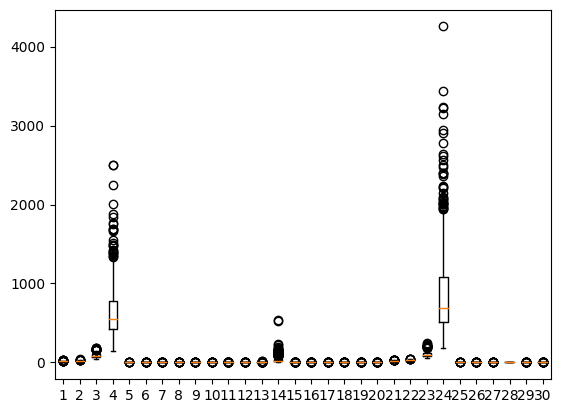

In [83]:
# plt.figure(figsize=(20,10))
plt.boxplot(X)
plt.show()

In [76]:
# X  <- 3,13,23 의 자료 확인
x_names = Data['feature_names'][[3,13,23]]

x_names

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [81]:
X1 = X[:,[3,13,23]]

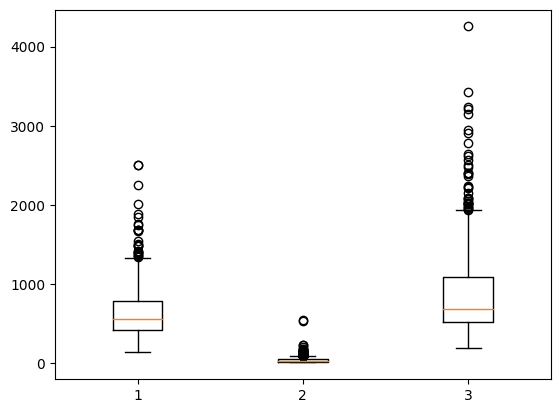

In [82]:
plt.boxplot(X1)
plt.show()